# Лабораторная работа 1

1) Классификация данных методом k ближайших соседей ( kNN)
3) Построение softmax-классификатора

Вариант 4: задания 1 и 3 на наборе данных MNIST

## 1. Классификация данных методом k ближайших соседей ( kNN)

In [60]:
import random
import numpy as np
import matplotlib.pyplot as plt


1.1 Скачайте данные в соответсвии с заданием.
MNIST 


In [61]:
from sklearn.datasets import load_digits
digits = load_digits()

1.2 Выведите несколько примеров изображений из обучающей выборки для каждого класса.



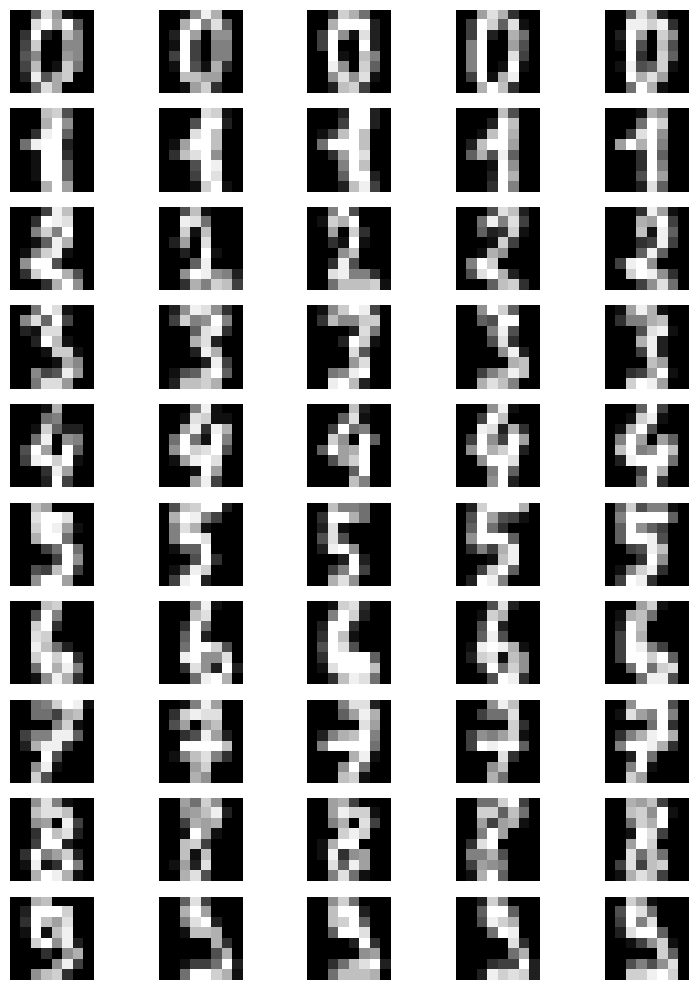

In [62]:
# Определение классов
classes = list(range(10))
fig, axes = plt.subplots(nrows=len(classes), ncols=5, figsize=(8, 10))

# Цикл для вывода примеров для каждого класса
for class_index, ax_row in zip(classes, axes):
    class_samples = digits.data[digits.target == class_index]
    for i, ax in enumerate(ax_row):
        ax.imshow(class_samples[i].reshape(8, 8), cmap='gray')
        ax.axis('off')
plt.tight_layout()
plt.show()

1.3 Разделите данные на обучающую и тестовую выборки (X_train, y_train, X_test, y_test). Преобразуйте каждое изображение в одномерный массив. 

In [63]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Преобразование каждого изображения в одномерный массив
X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)

1.4 Напишите реализацию классификатора в скрипте /classifiers/k_nearest_neighbor.py и обучите его на сформированной выборке. 

In [64]:
class KNearestNeighbor:
    def __init__(self, k=1):
        self.k = k

    def fit(self, X_train, y_train):
        """Метод обучения классификатора.
        
        Аргументы:
        X_train -- numpy массив, содержащий обучающие данные (каждая строка - один образец)
        y_train -- numpy массив, содержащий метки классов для обучающих данных
        """
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        """Метод предсказания классов для новых данных.
        
        Аргументы:
        X_test -- numpy массив, содержащий данные для предсказания (каждая строка - один образец)
        
        Возвращает:
        y_pred -- numpy массив, содержащий предсказанные метки классов для данных X_test
        """
        num_test = X_test.shape[0]
        y_pred = np.zeros(num_test, dtype=self.y_train.dtype)
        
        for i in range(num_test):
            # Вычисление расстояний между текущим тестовым образцом и всеми обучающими образцами
            distances = np.sum(np.abs(self.X_train - X_test[i,:]), axis=1)
            
            # Получение индексов k ближайших соседей
            k_indices = np.argsort(distances)[:self.k]
            
            # Нахождение меток классов для k ближайших соседей
            closest_y = self.y_train[k_indices]
            
            # Выбор наиболее часто встречающегося класса среди k ближайших соседей
            y_pred[i] = np.argmax(np.bincount(closest_y))
        
        return y_pred
    def get_params(self, deep=True):
        """Метод получения параметров классификатора."""
        return {'k': self.k}
    def set_params(self, **parameters):
        """Метод установки параметров классификатора."""
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

In [88]:
classifier = KNearestNeighbor()
classifier.fit(X_train, y_train)

1.5 Выполните классификацию на тестовой выборке

In [89]:
y_pred = classifier.predict(X_test)

1.6 Визуализируйте матрицу расстояний для каждого изображения из тестовой выборки до изображений из обучающей выборки. 

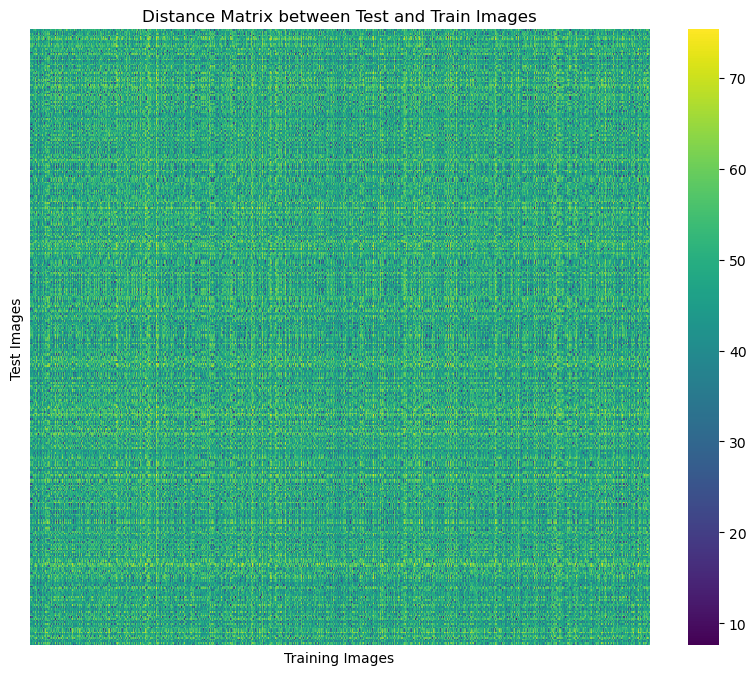

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Функция для вычисления евклидова расстояния между двумя точками
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Вычисление матрицы расстояний
distances = np.zeros((len(X_test), len(X_train)))
for i, test_image in enumerate(X_test):
    for j, train_image in enumerate(X_train):
        distances[i, j] = euclidean_distance(test_image, train_image)

# Визуализация матрицы расстояний
import seaborn as sns

# Создание тепловой карты для визуализации матрицы расстояний
plt.figure(figsize=(10, 8))
sns.heatmap(distances, cmap='viridis', cbar=True, xticklabels=False, yticklabels=False)
plt.title('Distance Matrix between Test and Train Images')
plt.xlabel('Training Images')
plt.ylabel('Test Images')
plt.show()

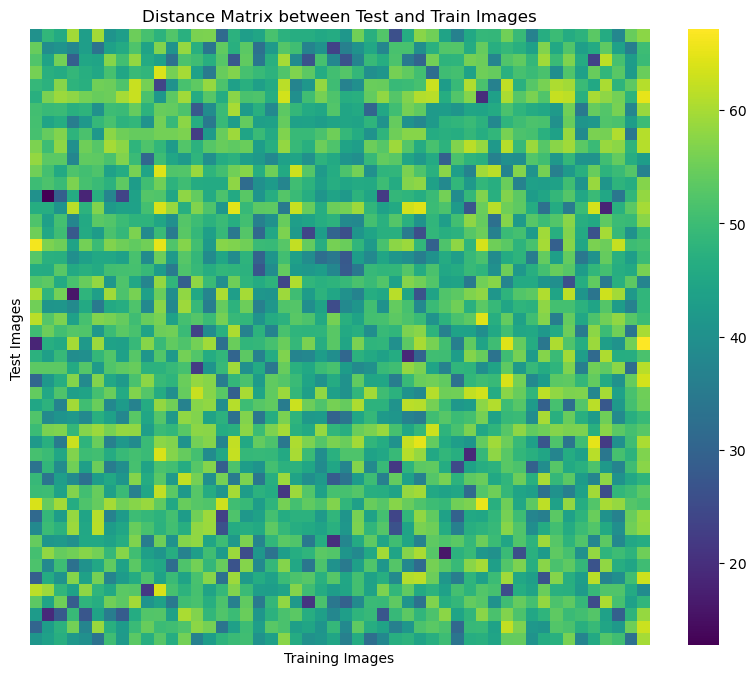

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Функция для вычисления евклидова расстояния между двумя точками
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Вычисление матрицы расстояний только для первых 50 изображений
num_test_images = 50
num_train_images = 50

distances = np.zeros((num_test_images, num_train_images))
for i, test_image in enumerate(X_test[:num_test_images]):
    for j, train_image in enumerate(X_train[:num_train_images]):
        distances[i, j] = euclidean_distance(test_image, train_image)

# Визуализация части матрицы расстояний
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(distances, cmap='viridis', cbar=True, xticklabels=False, yticklabels=False)
plt.title('Distance Matrix between Test and Train Images')
plt.xlabel('Training Images')
plt.ylabel('Test Images')
plt.show()



1.7 Посчитайте долю правильно классифицированных изображений из тестовой выборки.


In [92]:
from sklearn.metrics import accuracy_score

# Вычисление точности
accuracy = accuracy_score(y_test, y_pred)

# Вывод точности
print("Accuracy:", accuracy)

Accuracy: 0.975


1.8 Постройте график зависимости доли правильно классифицированных изображений от числа соседей, используемых при классификации.

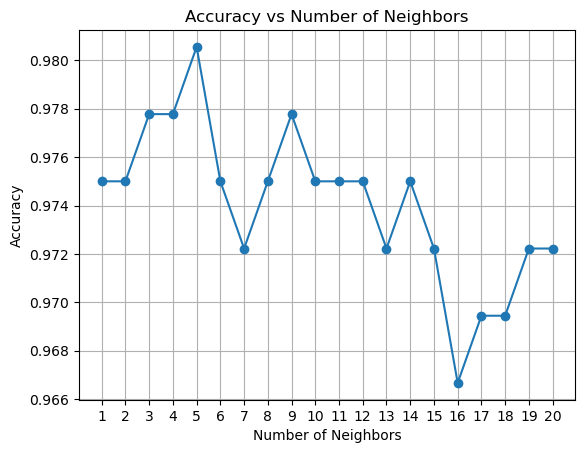

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Создание списка для сохранения точностей
accuracies = []

# Перебор различных значений числа соседей
neighbors_range = range(1, 21)
for k in neighbors_range:
    # Создание экземпляра классификатора k-ближайших соседей с текущим числом соседей
    classifier = KNearestNeighbor(k=k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    # Вычисление точности и добавление в список
    accuracy = np.mean(y_pred == y_test)
    accuracies.append(accuracy)

# Построение графика
plt.plot(neighbors_range, accuracies, marker='o')
plt.title('Accuracy vs Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neighbors_range)
plt.grid(True)
plt.show()


1.9 Выберите лучшее значение параметра k на основе кросс-валидации.


In [94]:
from sklearn.model_selection import GridSearchCV

# Определение списка значений параметра k
param_grid = {'k': range(1, 21)}

# Создание экземпляра классификатора k-ближайших соседей
knn = KNearestNeighbor()

# Создание объекта GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Поиск лучшего значения параметра k на основе кросс-валидации
grid_search.fit(X_train, y_train)

# Вывод лучшего значения параметра k
print("Best k:", grid_search.best_params_['k'])

Best k: 1



1.10 Переобучите и протестируйте классификатор с использованием выбранного значения k.



In [95]:
knn = KNearestNeighbor(k=1)

# Обучение классификатора
knn.fit(X_train, y_train)

# Предсказание меток классов для тестовых данных
y_pred = knn.predict(X_test)

# Оценка точности классификации
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.975


1.11 Сделайте выводы по результатам 1 части задания.

## Для решения данной задачи метод k ближайших соседей подходит хорошо, если смотреть на метрику accuracy. Лучших результатов удалось добиться при k = 1 или 3, однако различие с другими k отличается несущественно. Еще одно важное наблюдение: векторные и матричные операции работают быстрее, чем прямой перебор

## 3.  Построение softmax-классификатора

3.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [101]:
# Разделение данных на обучающую и временную выборки (80% обучающих данных, 20% временных данных)
X_train_temp, X_test, y_train_temp, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Разделение временной выборки на обучающую и валидационную выборки (60% обучающих данных, 20% валидационных данных)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42)

# Преобразование каждого изображения в одномерный массив
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Вывод размеров выборок
print("Размеры обучающей выборки:", X_train.shape)
print("Размеры валидационной выборки:", X_val.shape)
print("Размеры тестовой выборки:", X_test.shape)

Размеры обучающей выборки: (1077, 64)
Размеры валидационной выборки: (360, 64)
Размеры тестовой выборки: (360, 64)


3.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

3.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву данных и заполните ее единицами.

Среднее изображение: [0.00000000e+00 2.99907149e-01 5.14948932e+00 1.17966574e+01
 1.19359331e+01 5.89972145e+00 1.39832869e+00 1.42989786e-01
 6.49953575e-03 1.93129062e+00]


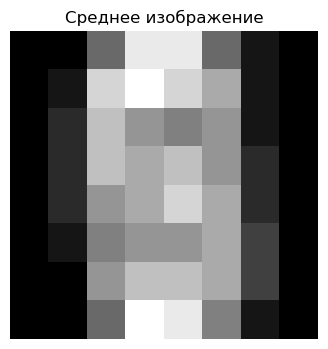

Размеры обучающей выборки после предварительной обработки: (1077, 65)
Размеры валидационной выборки после предварительной обработки: (360, 65)
Размеры тестовой выборки после предварительной обработки: (360, 65)


In [102]:
mean_image = np.mean(X_train, axis=0)
print("Среднее изображение:", mean_image[:10]) 
plt.figure(figsize=(4, 4))
plt.imshow(mean_image.reshape((8, 8)).astype('uint8'), cmap='gray') 
plt.axis('off')
plt.title('Среднее изображение')
plt.show()

# Предварительная обработка данных: вычитание среднего изображения
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image

# Добавление дополнительной размерности и заполнение ее единицами
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

# Вывод размеров обработанных выборок
print("Размеры обучающей выборки после предварительной обработки:", X_train.shape)
print("Размеры валидационной выборки после предварительной обработки:", X_val.shape)
print("Размеры тестовой выборки после предварительной обработки:", X_test.shape)


3.4 Реализуйте функции в classifiers/softmax.py




In [104]:
def softmax_loss_naive(W, X, y, reg):
    """
    Softmax loss function, naive implementation (with loops)

    Inputs have dimension D, there are C classes, and we operate on minibatches
    of N examples.

    Inputs:
    - W: A numpy array of shape (D, C) containing weights.
    - X: A numpy array of shape (N, D) containing a minibatch of data.
    - y: A numpy array of shape (N,) containing training labels; y[i] = c means
      that X[i] has label c, where 0 <= c < C.
    - reg: (float) regularization strength

    Returns a tuple of:
    - loss as single float
    - gradient with respect to weights W; an array of same shape as W
    """
    # Initialize the loss and gradient to zero.
    loss = 0.0
    dW = np.zeros_like(W)

    #############################################################################
    # TODO: Compute the softmax loss and its gradient using explicit loops.     #
    # Store the loss in loss and the gradient in dW. If you are not careful     #
    # here, it is easy to run into numeric instability. Don't forget the        #
    # regularization!                                                           #
    #############################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    num_train = X.shape[0]
    num_classes = W.shape[1]

    for i in range(num_train):
        # Compute scores for each class
        scores = X[i].dot(W)
        # Subtract the maximum score for numerical stability
        scores -= np.max(scores)
        # Compute softmax probabilities
        softmax_probs = np.exp(scores) / np.sum(np.exp(scores))
        # Compute cross-entropy loss
        loss += -np.log(softmax_probs[y[i]])
        # Compute gradient of the loss with respect to scores
        dScores = softmax_probs
        dScores[y[i]] -= 1
        # Update gradient
        dW += np.outer(X[i], dScores)

    # Average loss and gradient
    loss /= num_train
    dW /= num_train

    # Add regularization to the loss
    loss += 0.5 * reg * np.sum(W * W)
    # Add regularization to the gradient
    dW += reg * W

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    return loss, dW


def softmax_loss_vectorized(W, X, y, reg):
    """
    Softmax loss function, vectorized version.

    Inputs and outputs are the same as softmax_loss_naive.
    """
    # Initialize the loss and gradient to zero.
    loss = 0.0
    dW = np.zeros_like(W)

    #############################################################################
    # TODO: Compute the softmax loss and its gradient using no explicit loops.  #
    # Store the loss in loss and the gradient in dW. If you are not careful     #
    # here, it is easy to run into numeric instability. Don't forget the        #
    # regularization!                                                           #
    #############################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    num_train = X.shape[0]

    # Compute scores for all examples
    scores = X.dot(W)
    # Subtract the maximum score for numerical stability
    scores -= np.max(scores, axis=1, keepdims=True)
    # Compute softmax probabilities for all examples
    softmax_probs = np.exp(scores) / np.sum(np.exp(scores), axis=1, keepdims=True)
    # Compute cross-entropy loss
    loss = -np.sum(np.log(softmax_probs[np.arange(num_train), y])) / num_train
    # Compute gradient of the loss with respect to scores
    dScores = softmax_probs
    dScores[np.arange(num_train), y] -= 1
    # Compute gradient of the loss with respect to weights
    dW = X.T.dot(dScores) / num_train

    # Add regularization to the loss
    loss += 0.5 * reg * np.sum(W * W)
    # Add regularization to the gradient
    dW += reg * W

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    return loss, dW


In [109]:
import time

# Generate a random softmax weight matrix and use it to compute the loss.
W = np.random.randn(X_val.shape[1], 10) * 0.0001
loss, grad = softmax_loss_naive(W, X_val, y_val, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

loss: 2.304455
sanity check: 2.302585


3.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [115]:
from random import randrange
def grad_check_sparse(f, x, analytic_grad, num_checks=10, h=1e-5):
    """
    sample a few random elements and only return numerical
    in this dimensions.
    """

    for i in range(num_checks):
        ix = tuple([randrange(m) for m in x.shape])

        oldval = x[ix]
        x[ix] = oldval + h # increment by h
        fxph = f(x) # evaluate f(x + h)
        x[ix] = oldval - h # increment by h
        fxmh = f(x) # evaluate f(x - h)
        x[ix] = oldval # reset

        grad_numerical = (fxph - fxmh) / (2 * h)
        grad_analytic = analytic_grad[ix]
        rel_error = (abs(grad_numerical - grad_analytic) /
                    (abs(grad_numerical) + abs(grad_analytic)))
        print('numerical: %f analytic: %f, relative error: %e'
              %(grad_numerical, grad_analytic, rel_error))

In [116]:
loss, grad = softmax_loss_naive(W, X_val, y_val, 0.0)



f = lambda w: softmax_loss_naive(w, X_val, y_val, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)


loss, grad = softmax_loss_naive(W, X_val, y_val, 5e1)
f = lambda w: softmax_loss_naive(w, X_val, y_val, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

numerical: 0.044151 analytic: 0.044151, relative error: 1.149107e-09
numerical: 0.122566 analytic: 0.122566, relative error: 5.714022e-10
numerical: -0.016960 analytic: -0.016960, relative error: 1.076311e-09
numerical: -0.447744 analytic: -0.447744, relative error: 9.055321e-11
numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: 0.103894 analytic: 0.103894, relative error: 1.411991e-09
numerical: 0.000010 analytic: 0.000010, relative error: 7.194458e-06
numerical: 0.179929 analytic: 0.179929, relative error: 1.301232e-10
numerical: -0.356541 analytic: -0.356541, relative error: 3.922890e-11
numerical: 0.378459 analytic: 0.378459, relative error: 3.236252e-10
numerical: -0.125171 analytic: -0.125171, relative error: 1.632669e-11
numerical: 0.250853 analytic: 0.250853, relative error: 3.041536e-10
numerical: 0.009439 analytic: 0.009439, relative error: 1.078036e-09


C:\Users\jadik\AppData\Local\Temp\ipykernel_14316\1063684697.py:20: RuntimeWarning: invalid value encountered in scalar divide
  rel_error = (abs(grad_numerical - grad_analytic) /


numerical: 0.393444 analytic: 0.393444, relative error: 2.662368e-11
numerical: -0.028832 analytic: -0.028832, relative error: 7.958829e-10
numerical: -0.147149 analytic: -0.147149, relative error: 6.489282e-10
numerical: 0.278243 analytic: 0.278243, relative error: 8.336689e-11
numerical: -0.096700 analytic: -0.096700, relative error: 2.953404e-10
numerical: 0.024348 analytic: 0.024348, relative error: 1.192684e-09
numerical: -0.111136 analytic: -0.111136, relative error: 4.234492e-10


3.6 Сравните softmax_loss_naive и softmax_loss_vectorized реализации

In [123]:
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_val, y_val, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))


tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_val, y_val, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))


grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

naive loss: 2.304455e+00 computed in 0.009002s
vectorized loss: 2.304455e+00 computed in 0.001000s
Loss difference: 0.000000
Gradient difference: 0.000000


3.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

3.8 Обучите Softmax-классификатор и оцените accuracy на тестовой выборке.

In [125]:



class LinearClassifier(object):

    def __init__(self):
        self.W = None

    def train(self, X, y, learning_rate=1e-3, reg=1e-5, num_iters=100,
              batch_size=200, verbose=False):
        """
        Train this linear classifier using stochastic gradient descent.

        Inputs:
        - X: A numpy array of shape (N, D) containing training data; there are N
          training samples each of dimension D.
        - y: A numpy array of shape (N,) containing training labels; y[i] = c
          means that X[i] has label 0 <= c < C for C classes.
        - learning_rate: (float) learning rate for optimization.
        - reg: (float) regularization strength.
        - num_iters: (integer) number of steps to take when optimizing
        - batch_size: (integer) number of training examples to use at each step.
        - verbose: (boolean) If true, print progress during optimization.

        Outputs:
        A list containing the value of the loss function at each training iteration.
        """
        num_train, dim = X.shape
        num_classes = np.max(y) + 1 # assume y takes values 0...K-1 where K is number of classes
        if self.W is None:
            # lazily initialize W
            self.W = 0.001 * np.random.randn(dim, num_classes)

        # Run stochastic gradient descent to optimize W
        loss_history = []
        for it in range(num_iters):
            X_batch = None
            y_batch = None

            #########################################################################
            # TODO:                                                                 #
            # Sample batch_size elements from the training data and their           #
            # corresponding labels to use in this round of gradient descent.        #
            # Store the data in X_batch and their corresponding labels in           #
            # y_batch; after sampling X_batch should have shape (batch_size, dim)   #
            # and y_batch should have shape (batch_size,)                           #
            #                                                                       #
            # Hint: Use np.random.choice to generate indices. Sampling with         #
            # replacement is faster than sampling without replacement.              #
            #########################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

            indices = np.random.choice(num_train, batch_size, replace=True)
            X_batch = X[indices]
            y_batch = y[indices]

            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

            # evaluate loss and gradient
            loss, grad = self.loss(X_batch, y_batch, reg)
            loss_history.append(loss)

            # perform parameter update
            #########################################################################
            # TODO:                                                                 #
            # Update the weights using the gradient and the learning rate.          #
            #########################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

            self.W -= learning_rate * grad

            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

            if verbose and it % 100 == 0:
                print('iteration %d / %d: loss %f' % (it, num_iters, loss))

        return loss_history

    def predict(self, X):
        """
        Use the trained weights of this linear classifier to predict labels for
        data points.

        Inputs:
        - X: A numpy array of shape (N, D) containing training data; there are N
          training samples each of dimension D.

        Returns:
        - y_pred: Predicted labels for the data in X. y_pred is a 1-dimensional
          array of length N, and each element is an integer giving the predicted
          class.
        """
        y_pred = np.zeros(X.shape[0])
        ###########################################################################
        # TODO:                                                                   #
        # Implement this method. Store the predicted labels in y_pred.            #
        ###########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        scores = X.dot(self.W)
        y_pred = np.argmax(scores, axis=1)

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return y_pred

    def loss(self, X_batch, y_batch, reg):
        """
        Compute the loss function and its derivative.
        Subclasses will override this.

        Inputs:
        - X_batch: A numpy array of shape (N, D) containing a minibatch of N
          data points; each point has dimension D.
        - y_batch: A numpy array of shape (N,) containing labels for the minibatch.
        - reg: (float) regularization strength.

        Returns: A tuple containing:
        - loss as a single float
        - gradient with respect to self.W; an array of the same shape as W
        """
        pass
class LinearSVM(LinearClassifier):
    """ A subclass that uses the Multiclass SVM loss function """

    def loss(self, X_batch, y_batch, reg):
        return svm_loss_vectorized(self.W, X_batch, y_batch, reg)


class Softmax(LinearClassifier):
    """ A subclass that uses the Softmax + Cross-entropy loss function """

    def loss(self, X_batch, y_batch, reg):
        return softmax_loss_vectorized(self.W, X_batch, y_batch, reg)

3.9 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [126]:
def compute_accuracy(y_pred, y_true):
    """
    Вычисляет точность классификации.

    Аргументы:
    - y_pred: numpy массив, содержащий предсказанные метки классов для данных
    - y_true: numpy массив, содержащий истинные метки классов для данных

    Возвращает:
    - accuracy: точность классификации, вычисленная как доля правильно классифицированных образцов
    """
    num_correct = np.sum(y_pred == y_true)
    num_total = len(y_true)
    accuracy = num_correct / num_total
    return accuracy

In [13]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]

In [127]:
from sklearn.model_selection import KFold

# Параметры для перебора
learning_rates = [1e-7, 5e-7, 1e-6]
regularization_strengths = [2.5e4, 5e4, 1e5]

# Количество складок для кросс-валидации
num_folds = 5
# Список для сохранения результатов
results = {}

# Перебор всех возможных комбинаций параметров
for lr in learning_rates:
    for reg in regularization_strengths:
        # Создание экземпляра классификатора Softmax
        softmax_classifier = Softmax()
        # Список для сохранения точностей для каждой складки
        accuracies = []
        
        # Создание генератора разбиений для кросс-валидации
        kf = KFold(n_splits=num_folds)
        for train_index, val_index in kf.split(X_train):
            X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
            y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
            
            # Обучение классификатора
            softmax_classifier.train(X_train_fold, y_train_fold, learning_rate=lr, reg=reg, num_iters=1500, verbose=False)
            
            # Предсказание меток для валидационной выборки
            y_val_pred = softmax_classifier.predict(X_val_fold)
            
            # Вычисление точности классификации на валидационной выборке
            accuracy = compute_accuracy(y_val_pred, y_val_fold)
            accuracies.append(accuracy)
        
        # Сохранение результатов
        results[(lr, reg)] = np.mean(accuracies)

# Вывод результатов
for lr, reg in sorted(results):
    print('lr %e reg %e accuracy %f' % (lr, reg, results[(lr, reg)]))


lr 1.000000e-07 reg 2.500000e+04 accuracy 0.821813
lr 1.000000e-07 reg 5.000000e+04 accuracy 0.859793
lr 1.000000e-07 reg 1.000000e+05 accuracy 0.853282
lr 5.000000e-07 reg 2.500000e+04 accuracy 0.855142
lr 5.000000e-07 reg 5.000000e+04 accuracy 0.854212
lr 5.000000e-07 reg 1.000000e+05 accuracy 0.859789
lr 1.000000e-06 reg 2.500000e+04 accuracy 0.856068
lr 1.000000e-06 reg 5.000000e+04 accuracy 0.854208
lr 1.000000e-06 reg 1.000000e+05 accuracy 0.850500


In [128]:
# Выбор лучших параметров на основе результатов кросс-валидации
best_lr, best_reg = max(results, key=results.get)

# Создание экземпляра классификатора Softmax с лучшими параметрами
softmax_classifier = Softmax()
# Обучение классификатора на всей обучающей выборке с использованием лучших параметров
softmax_classifier.train(X_train, y_train, learning_rate=best_lr, reg=best_reg, num_iters=1500, verbose=True)

# Предсказание меток для тестовой выборки
y_test_pred = softmax_classifier.predict(X_test)

# Вычисление точности классификации на тестовой выборке
test_accuracy = compute_accuracy(y_test_pred, y_test)
print('Точность на тестовой выборке:', test_accuracy)


iteration 0 / 1500: loss 19.615990
iteration 100 / 1500: loss 8.655754
iteration 200 / 1500: loss 4.633895
iteration 300 / 1500: loss 3.157919
iteration 400 / 1500: loss 2.615827
iteration 500 / 1500: loss 2.417086
iteration 600 / 1500: loss 2.344134
iteration 700 / 1500: loss 2.317539
iteration 800 / 1500: loss 2.307696
iteration 900 / 1500: loss 2.304112
iteration 1000 / 1500: loss 2.302889
iteration 1100 / 1500: loss 2.302376
iteration 1200 / 1500: loss 2.302180
iteration 1300 / 1500: loss 2.302113
iteration 1400 / 1500: loss 2.302085
Точность на тестовой выборке: 0.8861111111111111


3.10 Сделайте выводы по третьей части задания

Параметры learning rate (скорость обучения) и regularization strength (коэффициент регуляризации) оказывают существенное влияние на точность классификации:

Наилучшие значения точности на тестовой выборке достигаются при learning rate равном 1e-7 или 5e-7 и regularization strength равном 5e4.
При изменении этих параметров точность также изменяется, что подтверждает необходимость тщательной настройки гиперпараметров для достижения оптимальных результатов.
Метод кросс-валидации позволяет оценить обобщающую способность модели и избежать переобучения. В данном случае использовалась 5-кратная кросс-валидация.

Обучение с использованием наилучших параметров позволило достичь высокой точности на тестовой выборке (около 88.6%). Это свидетельствует о хорошей обобщающей способности модели и её способности эффективно классифицировать новые данные.